# PREPROCESSING

In [1]:
# Import các thư viện cần thiết
!pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Đọc file CSV vào DataFrame(chỉnh lại path của file)

# Tập test
test_data = pd.read_csv(r"C:\Users\DELL\automated-essay-scoring\data\raw\test.csv")
test_data

# Tập train
train_data = pd.read_csv(r"C:\Users\DELL\automated-essay-scoring\data\raw\train.csv")
train_data

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\r\n\r\nThis is a letter to...",3
...,...,...,...
17302,ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2
17303,ffddf1f,Technology has changed a lot of ways that we l...,4
17304,fff016d,If you don't like sitting around all day than ...,2
17305,fffb49b,"In ""The Challenge of Exporing Venus,"" the auth...",1


In [3]:
# Hàm để biết đổi 't thành not
def expand_not_contractions(text):
    # Danh sách các từ viết tắt 't và cách chuyển đổi
    contractions = {
        "can't": "cannot",
        "won't": "will not",
        "shan't": "shall not",
        "don't": "do not",
        # Thêm các từ viết tắt khác vào đây nếu cần thiết
    }
    
    # Thay thế từ viết tắt bằng cách chuyển đổi tương ứng
    for contraction, expansion in contractions.items():
        text = re.sub(r"\b" + re.escape(contraction) + r"\b", expansion, text)
    
    return text

# Hàm để preprocessing dữ liệu
def clean_data(essay):
    # Chuyển đổi văn bản thành chữ thường
    essay_lower = essay.lower()

    # Chuyển các hậu tố 't thành not
    essay_remove_not = expand_not_contractions(essay_lower)

    # Loại bỏ các ký tự không phải chữ cái hoặc số
    essay_cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', essay_lower)

    # Tokenization chia nhỏ văn bản nếu có các từ bị dính liền
    words = word_tokenize(essay_cleaned)

    # Loại bỏ stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]

    # Lemmatization để chuyển đổi các từ về dạng gốc 
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    # Kết quả tiền xử lý
    processed_essay = ' '.join(lemmatized_words)
    return processed_essay

In [4]:
# Preprocessing data
# preprocessing_data = []
preprocessing_df = train_data.copy()
preprocessing_df['cleaned_text'] = preprocessing_df['full_text'].apply(clean_data)
preprocessing_df.drop('full_text', axis=1, inplace=True)

In [5]:
print(preprocessing_df)

      essay_id  score                                       cleaned_text
0      000d118      3  many people car live thing dont know use car a...
1      000fe60      3  scientist nasa discussing face mar explaining ...
2      001ab80      4  people always wish technology seen movie best ...
3      001bdc0      4  heard venus planet without almost oxygen earth...
4      002ba53      3  dear state senator letter argue favor keeping ...
...        ...    ...                                                ...
17302  ffd378d      2  story challenge exploing venus informative pie...
17303  ffddf1f      4  technology changed lot way live today nowadays...
17304  fff016d      2  dont like sitting around day great opportunity...
17305  fffb49b      1  challenge exporing venus author suggests study...
17306  fffed3e      2  venus worthy place study dangerous reaosn thei...

[17307 rows x 3 columns]


# EDA


### 1. Thống kê độ dài của đoạn văn

In [6]:
df = train_data.copy()
df['length_characters'] = df['full_text'].apply(len)

# Tính độ dài của mỗi câu dựa trên số lượng từ
df['length_words'] = df['full_text'].apply(lambda x: len(x.split()))
df

,essay_id,full_text,score,length_characters,length_words
0,000d118,Many people have car where they live. The thin...,3,2677,498
1,000fe60,I am a scientist at NASA that is discussing th...,3,1677,332
2,001ab80,People always wish they had the same technolog...,4,3083,550
3,001bdc0,"We all heard about Venus, the planet without a...",4,2709,451
4,002ba53,"Dear, State Senator\r\n\r\nThis is a letter to...",3,2218,373
...,...,...,...,...,...
17302,ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2,860,157
17303,ffddf1f,Technology has changed a lot of ways that we l...,4,3364,579
17304,fff016d,If you don't like sitting around all day than ...,2,1126,215
17305,fffb49b,"In ""The Challenge of Exporing Venus,"" the auth...",1,1427,231


c:\Users\DELL\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


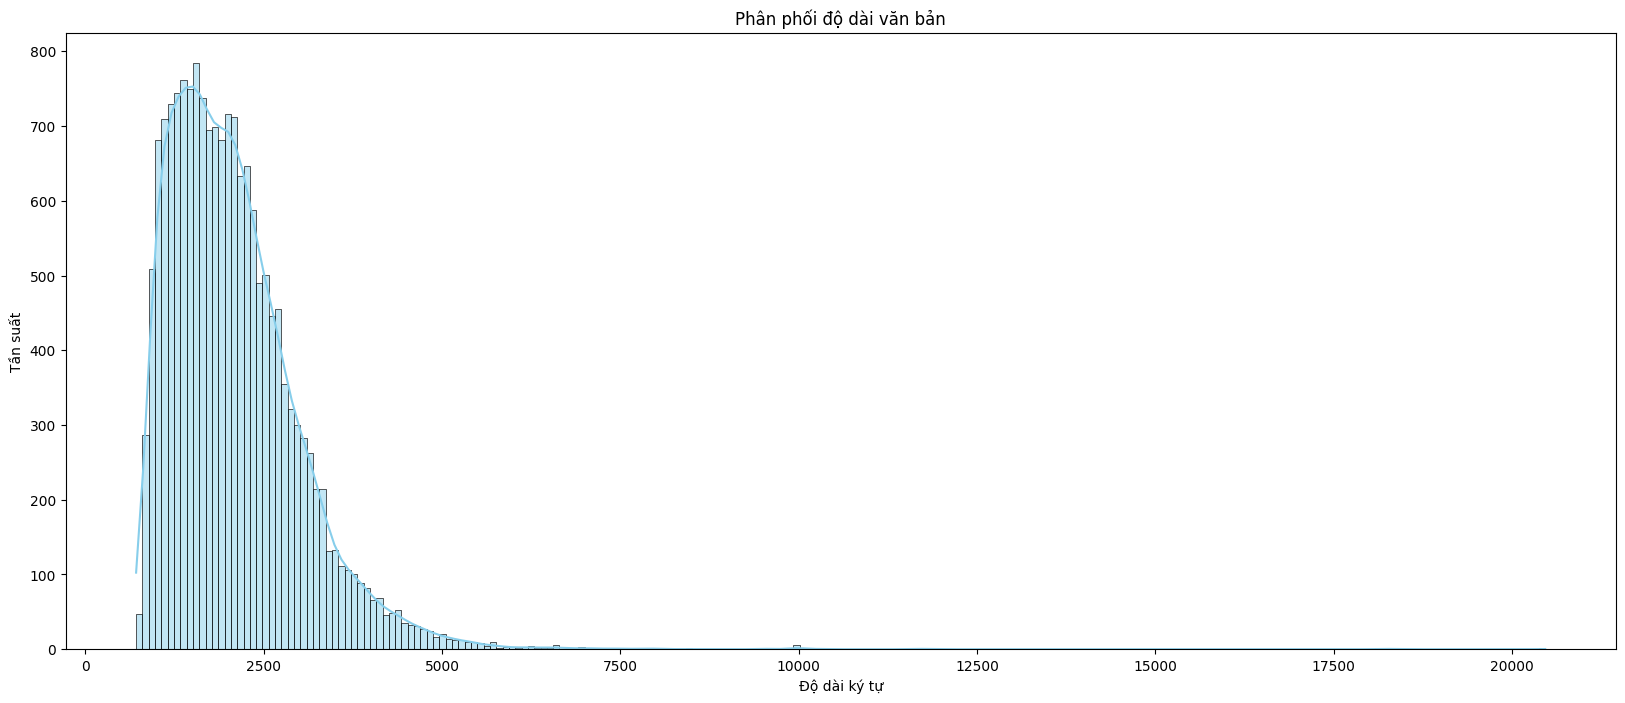

In [7]:
# Biểu đồ histogram của độ dài văn bản
plt.figure(figsize=(20, 8))
sns.histplot(df['length_characters'], kde=True, color='skyblue')
plt.title('Phân phối độ dài văn bản')
plt.xlabel('Độ dài ký tự')
plt.ylabel('Tần suất')
plt.show()


### 2. Phân bố của các label

score
3    6280
2    4723
4    3926
1    1252
5     970
6     156
Name: count, dtype: int64


c:\Users\DELL\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


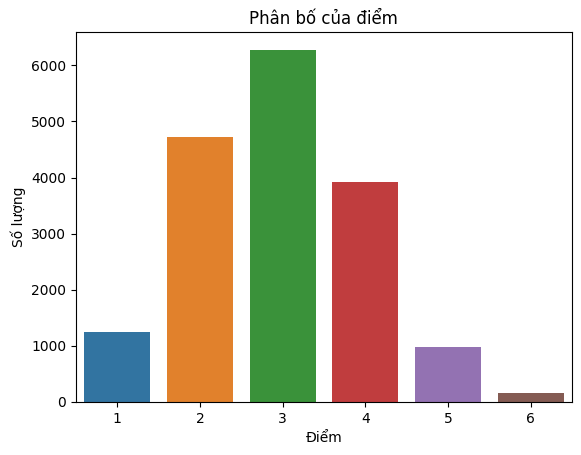

In [8]:
# Kiểm tra phân bố của nhãn(ở đây là score)
label_distribution = train_data['score'].value_counts()
print(label_distribution)

# Trực quan hóa phân bố của nhãn
sns.countplot(x='score', data=train_data)
plt.title('Phân bố của điểm')
plt.xlabel('Điểm')
plt.ylabel('Số lượng')
plt.show()

**Nhận xét:**
- Số lượng điểm 3 cao nhất chiếm hơn 6000 văn bản.
- Tuy nhiên có sự chênh lệch lớn giữa số lượng văn bản có điểm 3 và số văn bản có điểm 6 điều này có thể gây khó khăn trong quá trình phân tích dữ liệu.
- Có sự chênh lệch lớn giữa sự phân bố nhóm điểm cao và thấp.

### 3. Dùng thuật toán TF-TDF để xem các từ, cụm từ, câu văn... có tần xuất xuất hiện nhiều nhất


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Lấy dữ liệu từ cột "full_text"
documents = df['full_text']

# Tạo một đối tượng TfidfVectorizer với n-gram range từ 2 đến 3 (cụm từ từ 2 đến 3 từ)
vectorizer = TfidfVectorizer(ngram_range=(2, 3))

# Sử dụng fit_transform để tính toán TF-IDF cho các văn bản
tfidf_matrix = vectorizer.fit_transform(documents)

# Lấy các cụm từ vựng (n-grams)
feature_names = vectorizer.get_feature_names_out()

# Tính tổng của mỗi cột trong ma trận TF-IDF để lấy tổng tần suất xuất hiện của từng cụm từ
tfidf_sum = np.sum(tfidf_matrix, axis=0)

# Chuyển đổi kết quả thành mảng 1 chiều
tfidf_sum = np.array(tfidf_sum).flatten()

# Lấy chỉ số của 10 các cụm từ có tần suất xuất hiện cao nhất
top_indices = np.argsort(tfidf_sum)[::-1][:10]

# Lấy các cụm từ tương ứng với các chỉ số cao nhất
top_ngrams = [feature_names[i] for i in top_indices]

# In ra các cụm từ có tần suất xuất hiện nhiều nhất
print("Top n-grams with highest TF-IDF scores:")
for ngram in top_ngrams:
    print(ngram)



Top n-grams with highest TF-IDF scores:
of the
in the
electoral college
the electoral
driverless cars
the electoral college
the face
the author
the car
venus is


**Nhận xét:**
- Ta có thể thấy phần lớn các cụm từ có tần suất xuất hiện lớn đều có các **stop word** điều này gây khó khăn cho việc phân tích dữ liệu. Do đó việc loại bỏ các **stop word** ở phần preprocessing là cần thiết

### 4. Dùng Wordcloud để hiển thị các từ quan trọng và phố biến trong tập dữ liệu

   ---------------------------------------- 0.0/300.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.6 kB 495.5 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/300.6 kB 657.6 kB/s eta 0:00:01
   ------------------------ --------------- 184.3/300.6 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 300.6/300.6 kB 1.4 MB/s eta 0:00:00


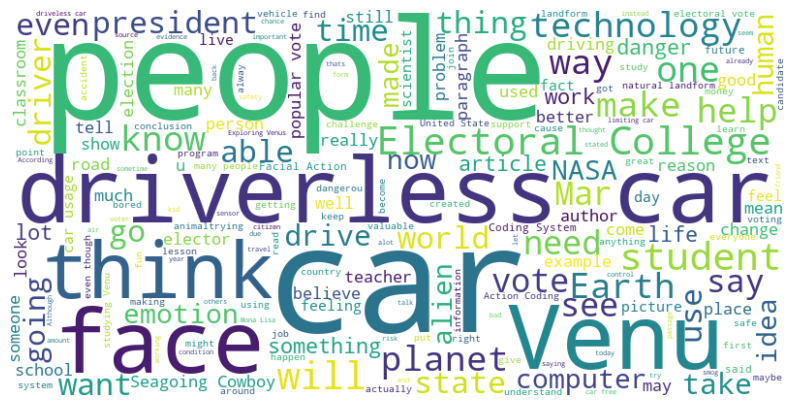

In [10]:
# Import các thư viện cần thiết
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tạo một string từ tất cả các văn bản
all_text = " ".join(df['full_text'])

# Tạo WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Hiển thị WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Nhận xét:**
- Nhìn vào hình vẽ ta có thể thấy các từ như *people, driver, Venu, Car, think*, ...
- Các từ có tần xuất hiện thấp như *already, might*,...